# Titanic Project

Feature Variable:

    * PassengerId
    * Pclass
    * Name
    * Sex
    * Age
    * SibSp
    * Parch
    * Ticket
    * Fare
    * Cabin
    * Embarked
    
Target Variable:

    * Survived

In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are three column having null values which are: 
    
    * Age 
    * Cabin 
    * Embarked

In [6]:
data["Cabin"].isnull().sum()/len(data["Cabin"])*100

# Cabin value is less than 80% so,we impute the value for Cabin.

77.10437710437711

In [7]:
# impute continuous data
data['Age']=data['Age'].fillna(data['Age'].mean())

# impute categorical data
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0]) 
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0]) 

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Convert object data type into float data type

In [10]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,47.0,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,47.0,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,47.0,2.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


All the values of a columns are of integer and float type.Now the data set is proper for our analysis.

# ANALYSIS

                             Visualisation of nominal data

The nominal data that are:

    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [13]:
data_visualization_nominal=data[['Name','Sex','Ticket','Cabin','Embarked']].copy()

data_visualization_nominal.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

108.0    1
98.0     1
267.0    1
284.0    1
566.0    1
        ..
431.0    1
518.0    1
411.0    1
428.0    1
220.0    1
Name: Name, Length: 891, dtype: int64


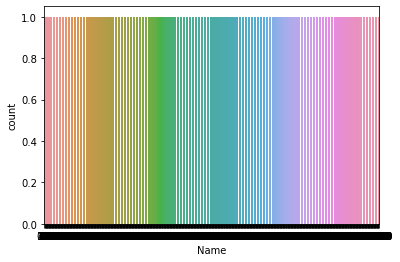

In [14]:
ax= sns.countplot(x='Name',data=data_visualization_nominal)
print(data_visualization_nominal['Name'].value_counts())

1.0    577
0.0    314
Name: Sex, dtype: int64


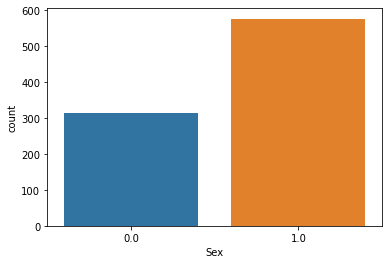

In [15]:
ax= sns.countplot(x='Sex',data=data_visualization_nominal)
print(data_visualization_nominal['Sex'].value_counts())

333.0    7
568.0    7
80.0     7
249.0    6
566.0    6
        ..
513.0    1
98.0     1
212.0    1
606.0    1
466.0    1
Name: Ticket, Length: 681, dtype: int64


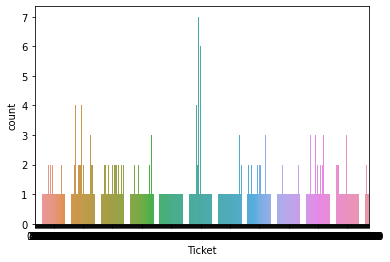

In [16]:
ax= sns.countplot(x='Ticket',data=data_visualization_nominal)
print(data_visualization_nominal['Ticket'].value_counts())

47.0     691
145.0      4
63.0       4
62.0       3
142.0      3
        ... 
124.0      1
76.0       1
72.0       1
125.0      1
60.0       1
Name: Cabin, Length: 147, dtype: int64


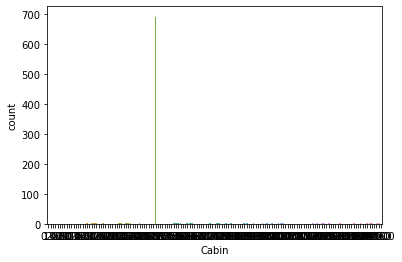

In [17]:
ax= sns.countplot(x='Cabin',data=data_visualization_nominal)
print(data_visualization_nominal['Cabin'].value_counts())

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64


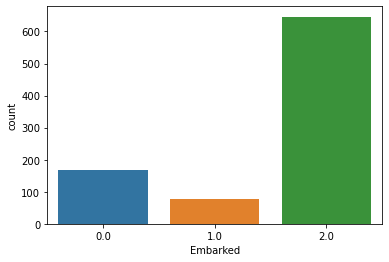

In [18]:
ax= sns.countplot(x='Embarked',data=data_visualization_nominal)
print(data_visualization_nominal['Embarked'].value_counts())

                                   Visualisation of continuous data

In [19]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

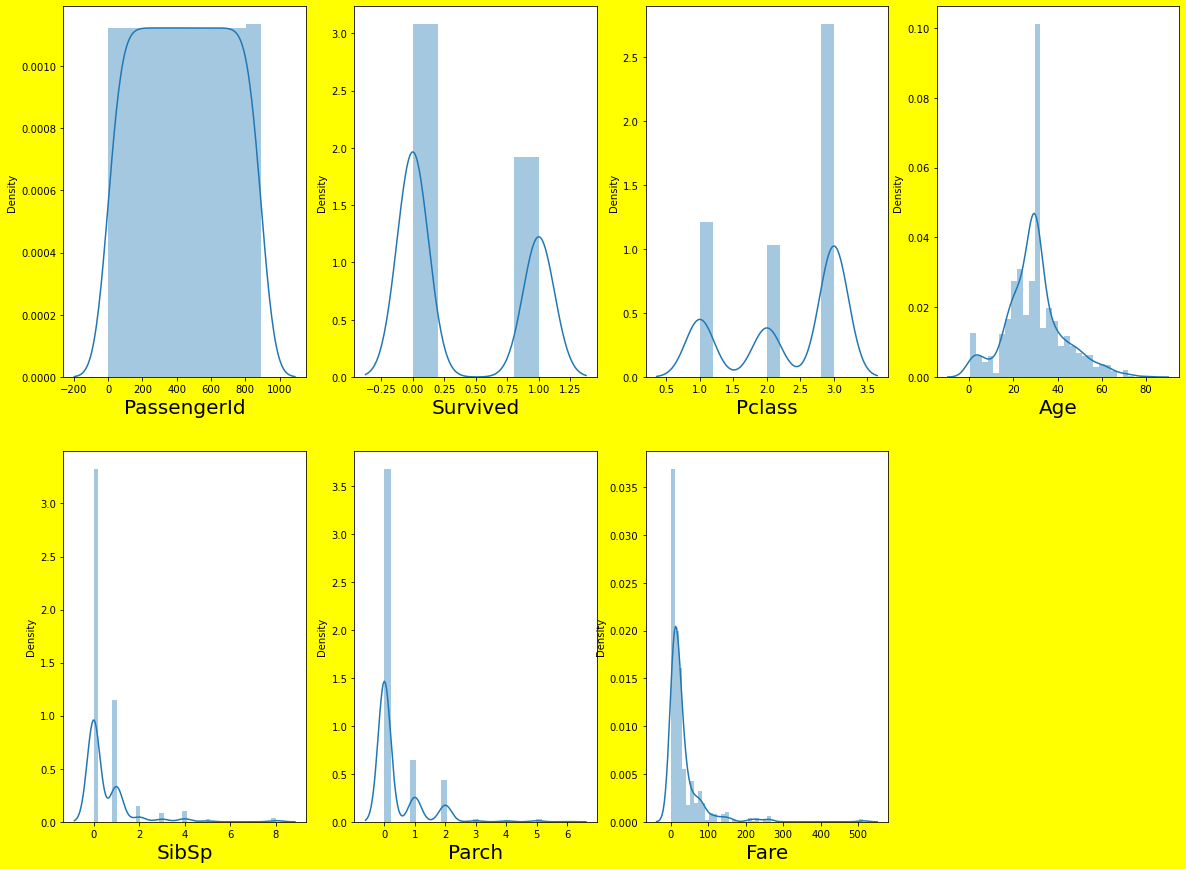

In [20]:
df=data.drop(columns=['Name','Sex','Ticket','Cabin','Embarked'])

plt.figure(figsize=(20,15),facecolor = 'yellow')
plotnumber =1

for column in df:
    if plotnumber <=7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()   

                                       Describe the dataset

In [21]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


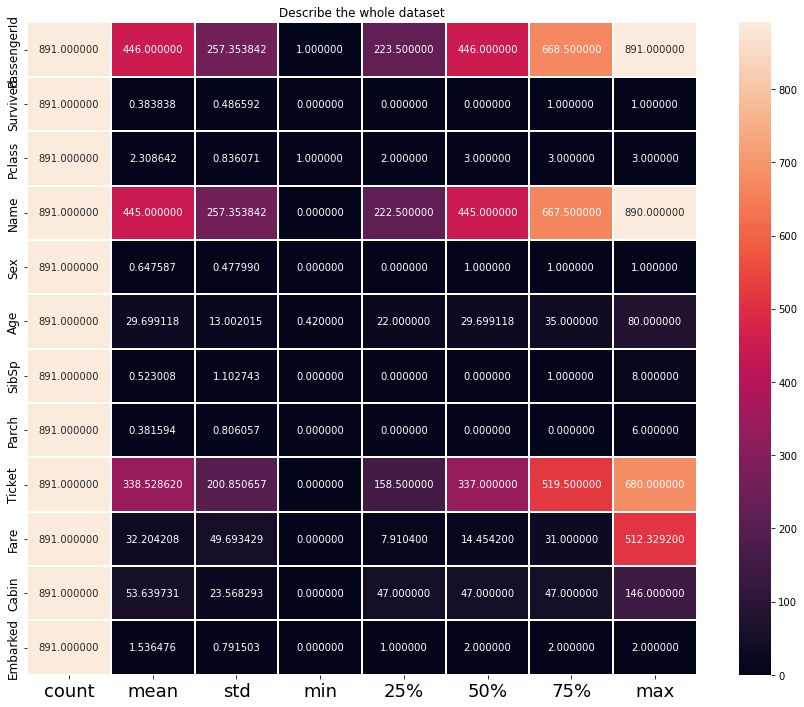

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

There is no null values.

The number of rows and columns are:
    
    rows =  891
    columns = 12
    
The mean,std,minimum,maximum values are:
    
    * PassengerId:
        mean    = 446.000000
        std     = 257.353842
        minimum = 1.000000
        maximum = 891.000000
        
    * Pclass:
        mean    = 2.308642
        std     = 0.836071
        minimum = 1.000000
        maximum = 3.000000  
        
    * Name:
        mean    = 445.000000
        std     = 257.353842
        minimum = 0.000000
        maximum = 890.000000
        
    * Sex:
        mean    = 0.647587
        std     = 0.477990
        minimum = 0.000000
        maximum = 1.000000   
        
    * Age:
        mean    = 29.699118
        std     = 13.002015
        minimum = 0.420000
        maximum = 80.000000
        
    * SibSp:
        mean    = 0.523008
        std     = 1.102743
        minimum = 0.000000
        maximum = 8.000000
        
    * Parch:
        mean    = 0.381594
        std     = 0.806057
        minimum = 0.000000
        maximum = 6.000000    
        
    * Ticket:
        mean    = 338.528620
        std     = 200.850657
        minimum = 0.000000
        maximum = 680.000000
        
    * Fare:
        mean    = 32.204208
        std     = 49.693429
        minimum = 0.000000
        maximum = 512.329200
        
    * Cabin:
        mean    = 53.639731
        std     = 23.568293
        minimum = 0.000000
        maximum = 146.000000
        
    * Embarked:
        mean    = 1.536476
        std     = 0.791503
        minimum = 0.000000
        maximum = 2.000000
        

                                  Correlation

In [23]:
data.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719


<AxesSubplot:>

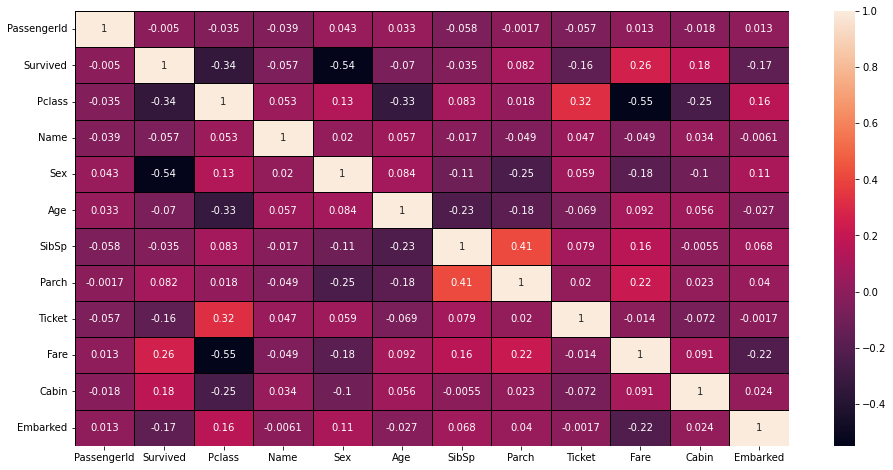

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

       Skewness and outliers are consider only on continuous data not on categorical data and on target variable

                                   Outliers

In [25]:
# continuous dataset only
# No categorical data and no target variable

new_df=data.drop(columns=['Name','Sex','Ticket','Cabin','Embarked','Survived'])

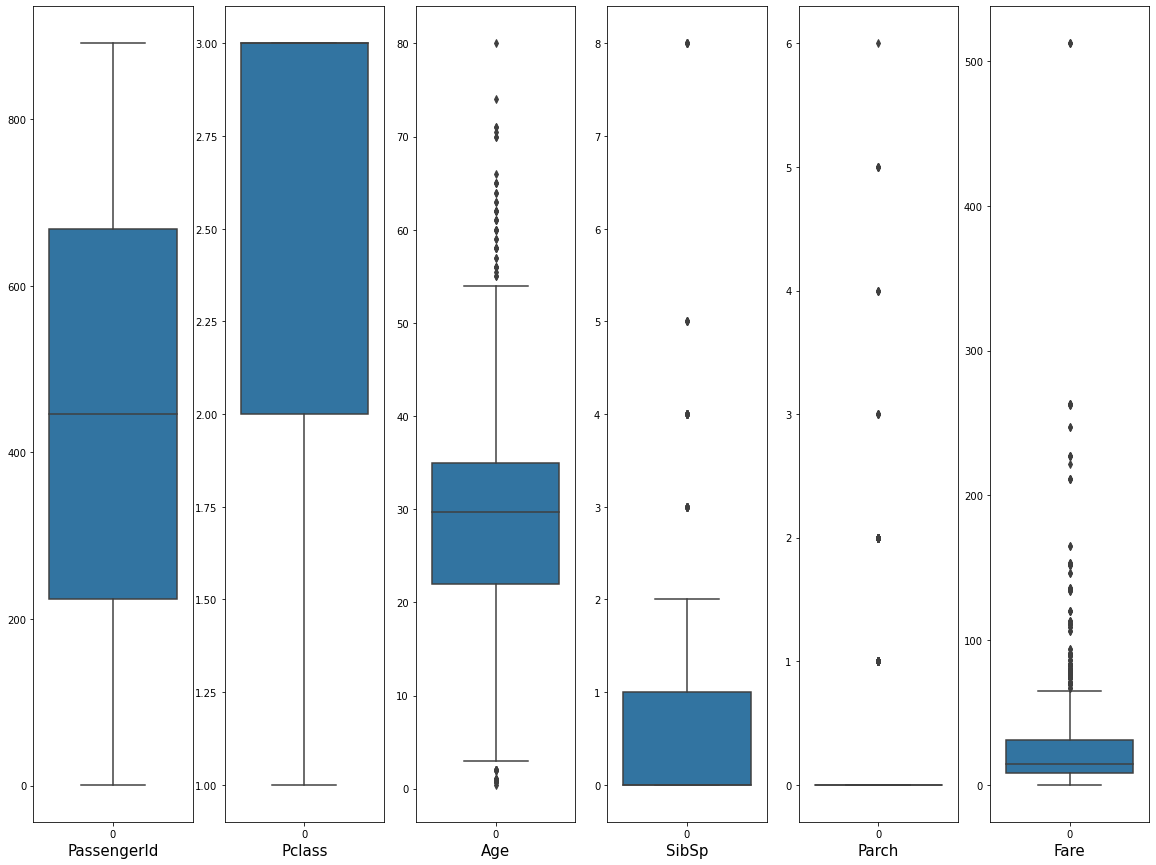

In [26]:
plt.figure(figsize=(20,15))
number = 1

for column in new_df:
    if number <=6:
        plt.subplot(1,6,number)
        ax = sns.boxplot(data=new_df[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Outliers are present:
    
    In Upward direction
        * Age
        * SibSp
        * Parch
        * Fare
        
    In Downward direction
        * Age

                                             Skewness

In [27]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.268926
Embarked      -1.264823
dtype: float64

Take thrashold as (-0.5,0.5) for skewness

So, skewness is present in the columns:

    Pclass
    SibSp
    Parch
    Fare

                                 Variance Inflation Factor

In [28]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.011708,PassengerId
1,2.043038,Pclass
2,1.016000,Name
3,1.119118,Sex
4,1.217659,Age
5,1.288122,SibSp
6,1.327062,Parch
7,1.177055,Ticket
8,1.724930,Fare
9,1.086250,Cabin


All the VIF values are less than 5. So,we considerd that there is no multicolinearity in the titanic dataset

                                   Remove Skewness by transformer technique

    * Pclass is left skewed,for this we use square method.
    * Sibsp,Parch and Fare are right skewed,for this we use square root 
    

In [29]:
data['Pclass']=pow(data['Pclass'],2)

In [32]:
data['SibSp']=np.sqrt(data['SibSp'])
data['Parch']=np.sqrt(data['Parch'])
data['Fare']=np.sqrt(data['Fare'])

In [33]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.444064
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          1.436526
Parch          1.291221
Ticket         0.000246
Fare           0.519679
Cabin          2.268926
Embarked      -1.264823
Sibsp          1.436526
dtype: float64

Skewness is still present in some columns .So,we removed/droped that columns from the dataset which are:
    
    SibSp
    Parch 
    Fare 

In [36]:
data=data.drop(['Parch','Fare'],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,Sibsp
0,1,0,9,108.0,1.0,22.0,523.0,47.0,2.0,1.0
1,2,1,1,190.0,0.0,38.0,596.0,81.0,0.0,1.0
2,3,1,9,353.0,0.0,26.0,669.0,47.0,2.0,0.0
3,4,1,1,272.0,0.0,35.0,49.0,55.0,2.0,1.0
4,5,0,9,15.0,1.0,35.0,472.0,47.0,2.0,0.0


In [38]:
data=data.drop(['Sibsp'],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked
0,1,0,9,108.0,1.0,22.0,523.0,47.0,2.0
1,2,1,1,190.0,0.0,38.0,596.0,81.0,0.0
2,3,1,9,353.0,0.0,26.0,669.0,47.0,2.0
3,4,1,1,272.0,0.0,35.0,49.0,55.0,2.0
4,5,0,9,15.0,1.0,35.0,472.0,47.0,2.0


In [39]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)                      

In [42]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([  6,  10,  66,  75,  96, 116, 128, 148, 183, 193, 205, 251, 262,
       309, 337, 339, 340, 345, 370, 394, 434, 456, 462, 493, 516, 558,
       577, 585, 618, 630, 662, 672, 699, 715, 724, 745, 772, 776, 809,
       835, 851], dtype=int64), array([6, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 4, 6, 6, 6, 6, 6, 4, 6, 4, 6, 6, 6, 4, 6, 6, 6, 6, 4],
      dtype=int64))


Outliers removed from categorical column(ie, Sex and Ticket) ,so we take our orignal data

# MODEL TESTING

In [43]:
# input data
x=data.drop(['Survived'],axis=1)

# output variable
y=data['Survived']

In [47]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                               Logistic Regression

In [121]:
lr=LogisticRegression()

In [122]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("The model perform very well")
        print("random state",i)
        print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

The model perform very well
random state 68
Training accuracy score: 81.6
Testing accuracy score: 81.6


The model perform very well
random state 106
Training accuracy score: 81.0
Testing accuracy score: 81.0


The model perform very well
random state 274
Training accuracy score: 81.0
Testing accuracy score: 81.0


The model perform very well
random state 294
Training accuracy score: 81.6
Testing accuracy score: 81.6


The model perform very well
random state 372
Training accuracy score: 79.9
Testing accuracy score: 79.9


The model perform very well
random state 385
Training accuracy score: 81.0
Testing accuracy score: 81.0


The model perform very well
random state 389
Training accuracy score: 81.0
Testing accuracy score: 81.0


The model perform very well
random state 424
Training accuracy score: 81.0
Testing accuracy score: 81.0


The model perform very well
random state 448
Training accuracy score: 81.6
Testing accuracy score: 81.6


The model perform very well
random state 466
Tr

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=68)  

In [124]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 81.56424581005587


In [125]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[94 11]
 [22 52]]


In [126]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [127]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7755454224819872


At cross fold 3 the cv score is 0.7991021324354657


At cross fold 4 the cv score is 0.7946360037167212


At cross fold 5 the cv score is 0.7957504237022157


At cross fold 6 the cv score is 0.7979699498155873


At cross fold 7 the cv score is 0.796857424071991


At cross fold 8 the cv score is 0.7990870334620335


At cross fold 9 the cv score is 0.8013468013468014




In [128]:
lrscore=cross_val_score(lr,x_scaled,y,cv=9)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 80.13468013468014


                                  KNeighbors Classifier

In [78]:
knn= KNeighborsClassifier()

In [79]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 79.3296089385475


In [80]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[93 12]
 [25 49]]


In [81]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [82]:
knnscore=cross_val_score(knn,x_scaled,y,cv=9)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 79.57351290684625


                                  Decision Tree Classifier

In [63]:
clf=DecisionTreeClassifier()

In [64]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 74.86033519553072


In [65]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[87 18]
 [27 47]]


In [66]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       105
           1       0.72      0.64      0.68        74

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



In [67]:
clfscore=cross_val_score(clf,x_scaled,y,cv=9)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 75.64534231200898


                                Random Forest Classifier

In [68]:
rfc=RandomForestClassifier()

In [69]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 79.88826815642457


In [70]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[98  7]
 [29 45]]


In [71]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       105
           1       0.87      0.61      0.71        74

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.79       179



In [72]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=9)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 81.59371492704825


                                            SVC

In [73]:
svc=SVC()

In [74]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 79.88826815642457


In [75]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[100   5]
 [ 31  43]]


In [76]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.76      0.95      0.85       105
           1       0.90      0.58      0.70        74

    accuracy                           0.80       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.80      0.79       179



In [77]:
svcscore=cross_val_score(svc,x_scaled,y,cv=9)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 80.80808080808082


Logistic Regression :
    accuracy score: 81.56
    cv score:       80.13  
        
KNNeighbors Classifier:
    accuracy score: 79.33
    cv score:       79.57    

Decision Tree Classifier:
    accuracy score: 74.86
    cv score:       75.64   
        
Random Forest Classifier:
    accuracy score: 79.89 
    cv score:       81.59   
        
SV Classifier:
    accuracy score: 79.88
    cv score:       80.80   
        

All the five models classify better accuracy and we consider KNNeighbors Classifier for more better result.     
accuracy score=79.33

# Modeling of KNNeighbors Classifier

                                Hyper Parameter Tunning

In [132]:
kn=KNeighborsClassifier()

In [133]:
parameters={'n_neighbors':range(3,10),
            'leaf_size':range(3,8),
           'weights':['uniform','distance'],
           'metric':['minkowski','euclidean','manhattan']}

In [134]:
GCV=GridSearchCV(kn,parameters,cv=9,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}

In [135]:
clf = KNeighborsClassifier(leaf_size=3,metric='minkowski',n_neighbors=9,weights='uniform')

clf.fit(x_train,y_train)

pred = clf.predict(x_test)
accuracy_score(y_test,pred)*100

81.56424581005587

After hyper parameter tuning we get accuracy score=81.56 

                            Plot ROC_AUC curve and find the AUC value

In [136]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred) 

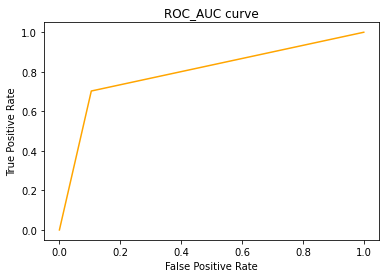

In [137]:
plt.plot(fpr,tpr,color='orange',label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')                                                                                
plt.show()

In [140]:
auc_score = roc_auc_score(y_test,y_pred)*100
print("AUC_score",auc_score)

AUC_score 79.8970398970399


Accuracy score is 81.56 and AUC score is 79.89 which is not good as accuracy score

                                      Save the model 

In [142]:
import joblib

joblib.dump(GCV.best_params_,'Titanic.pkl')


['Titanic.pkl']

                                        Coclusion

In [143]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":pred})
Prediction

,Actual_value,Predicted_value
502,0,1
490,0,0
367,1,1
210,0,0
750,1,1
...,...,...
347,1,0
232,0,0
170,0,0
850,0,0
